# LEAD SCORING CASE STUDY 
- X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#Suppresssing warnings and importing libraries
import warnings
warnings.filterwarnings('ignore')
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing dataset to csv

leads_df=pd.read_csv("Leads.csv")

In [4]:
#Let's see the head of our dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Let's check the dimesions of the dataframe
leads_df.shape

(9240, 37)

In [6]:
#Statstical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Let's check out info of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

In [10]:
## Exploratory Data Analysis


In [11]:
#Data cleaning
#dropping Lead Number and Prospect ID since they have all unique values

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [12]:
#Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [13]:
#Checking for count of missing values in each column
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
#checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [ ]:
## Dropping Columns with Missing Values >=35%

In [15]:
#Drop all the columns with more than 45% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 35):
        leads_df.drop(i, 1, inplace = True)

In [16]:
#checking percentage of null values in each column after dropping columns with more than 45% missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [ ]:
##Categorical Attributes Analysis:

In [ ]:
#Imbalanced Variables

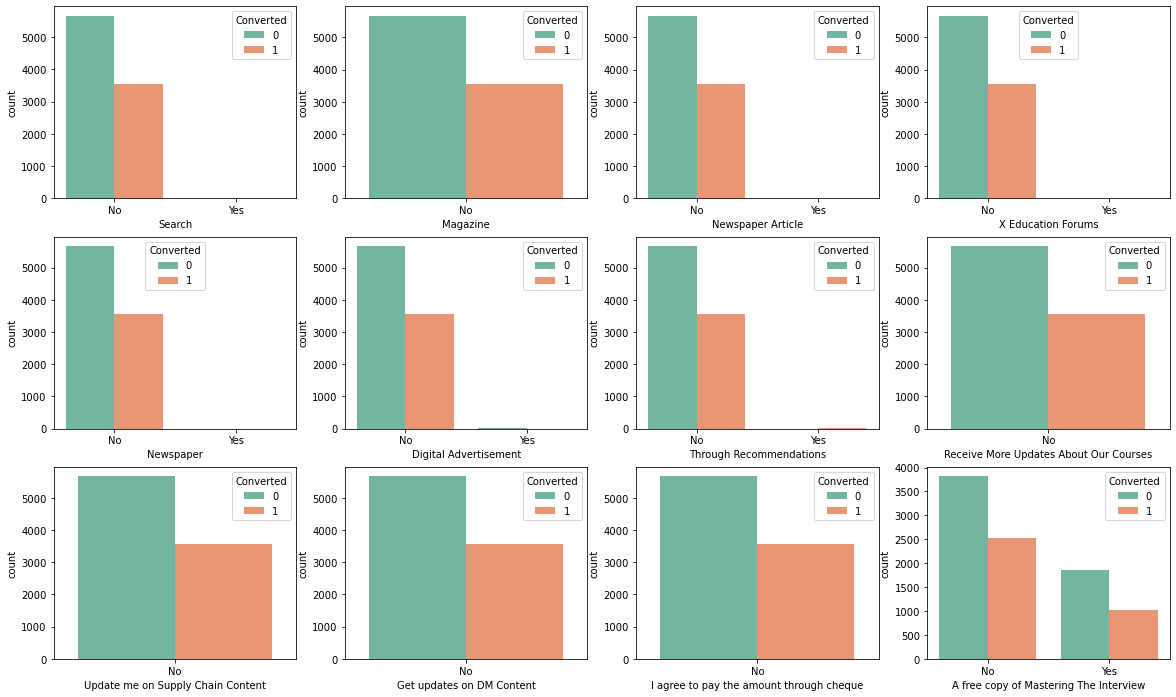

In [17]:
# Visualzing  variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = leads_df, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = leads_df, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads_df, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_df, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_df, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df, ax = axs[2,3],palette = 'Set2')
plt.show()

In [18]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [ ]:
##Lead Source

In [19]:
#checking value counts of Lead Source column

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [20]:
#replacing Nan Value with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

In [21]:
#combining low frequency values to Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

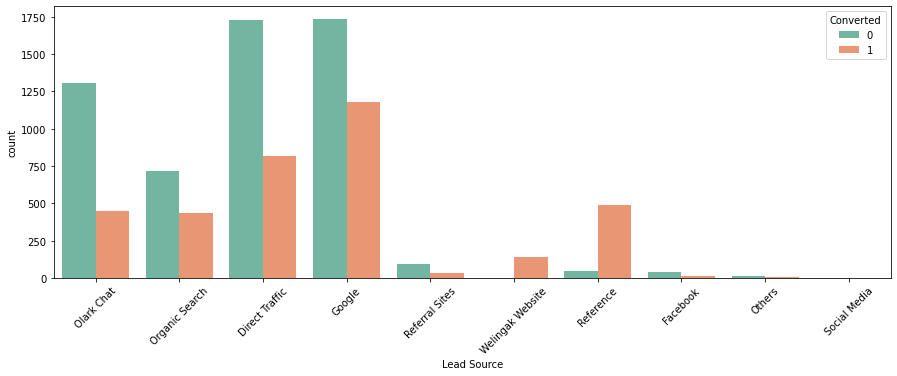

In [22]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
##Country

In [23]:
#checking value counts of Country column

leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [24]:
#Imputing missing values in Country column with "'not provided"
leads_df['Country'] = leads_df['Country'].replace(np.nan,'not provided')

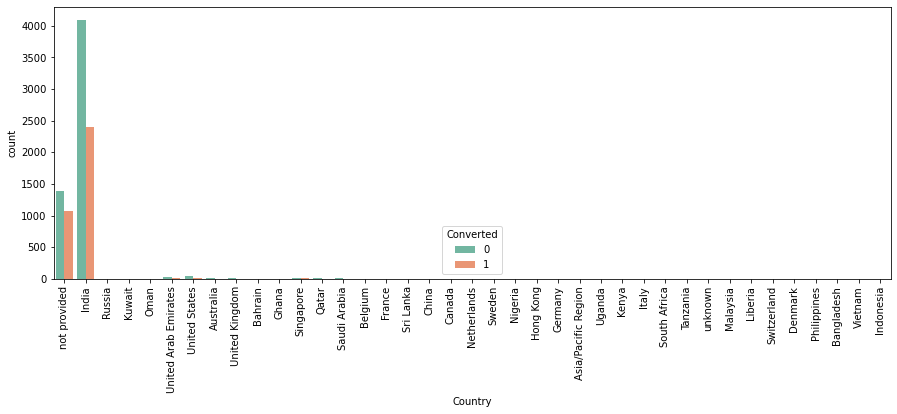

In [25]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [ ]:
# creating a list of columns to be droppped

cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

In [ ]:
##What is your current occupation

In [27]:
#checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
#Creating new category 'Not provided'

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not provided')

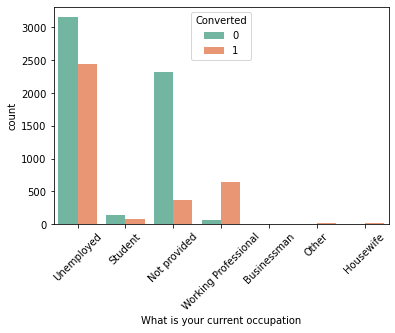

In [29]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [ ]:
##What matters most to you in choosing a course

In [30]:
#checking value counts of 'What matters most to you in choosing a course'

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

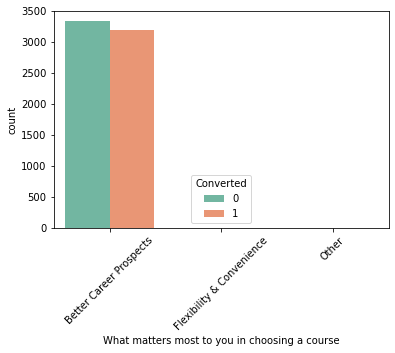

In [31]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [32]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [ ]:
##Last Activity

In [33]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [ ]:
#Missing values can be imputed with mode value "Email Opened"

In [34]:
#replacing Nan Values with mode value "Email Opened"

leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

In [35]:
#combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

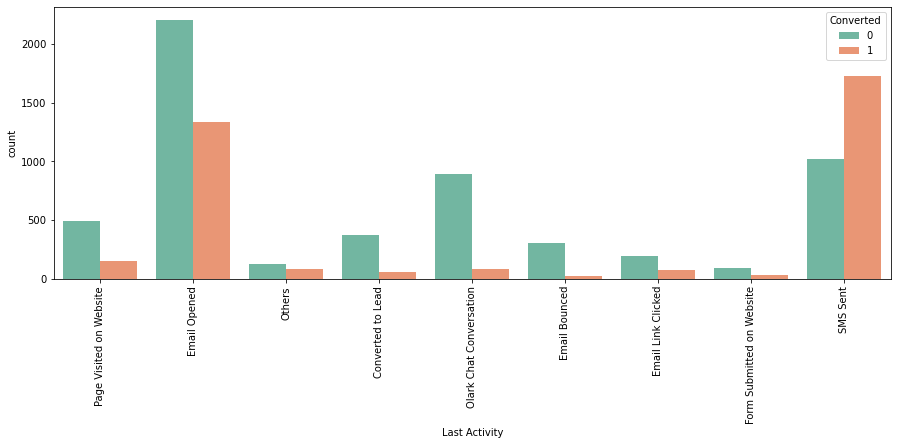

In [36]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [37]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [38]:
#Check the Null Values in All Columns after imputation:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [39]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leads_df = leads_df.dropna()

In [40]:
leads_df.shape

(6401, 25)

In [41]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [ ]:
##Lead Origin

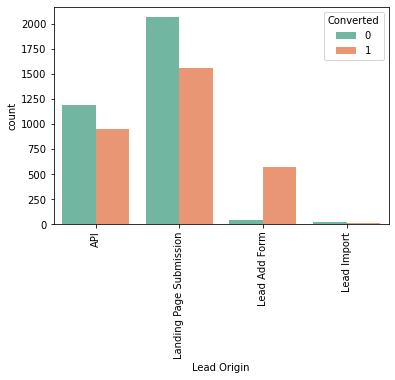

In [42]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
##Do Not Email & Do Not Call

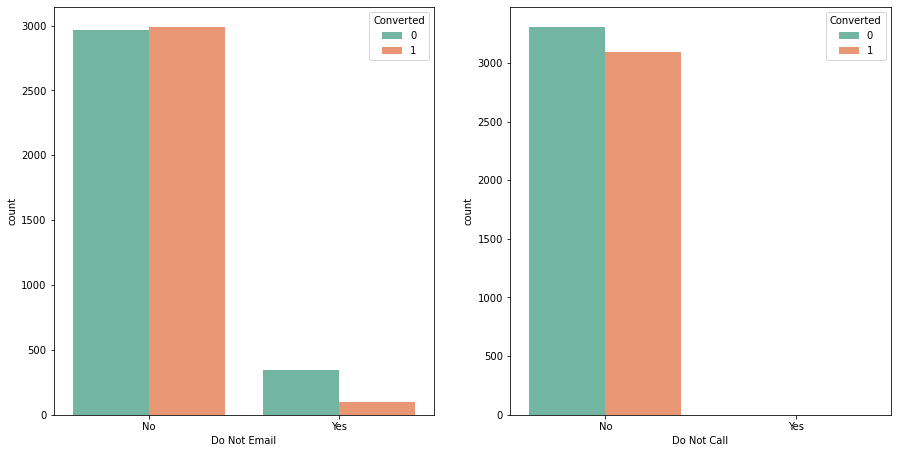

In [43]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1],palette = 'Set2')
plt.show()

In [ ]:
#We Can append the Do Not Call Column to the list of Columns to be Dropped data is higjly skewed

In [44]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

In [ ]:
##Last Notable Activity

In [45]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Email Opened                    2042
Modified                        1950
SMS Sent                        1889
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [46]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

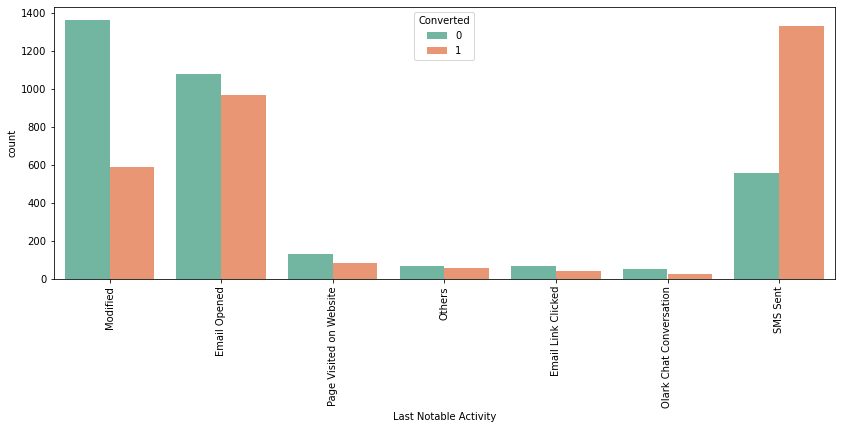

In [47]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [48]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [49]:
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [50]:
#dropping columns
leads = leads_df.drop(cols_to_drop,1)

#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6401 non-null   object 
 1   Lead Source                      6401 non-null   object 
 2   Do Not Email                     6401 non-null   object 
 3   Converted                        6401 non-null   int64  
 4   TotalVisits                      6401 non-null   float64
 5   Total Time Spent on Website      6401 non-null   int64  
 6   Page Views Per Visit             6401 non-null   float64
 7   What is your current occupation  6401 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 450.1+ KB


In [51]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


In [ ]:
## Numerical Attributes Analysis:

In [ ]:
#Converted

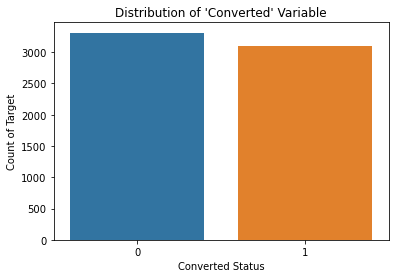

In [52]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(leads.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [53]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

48.28932979221997

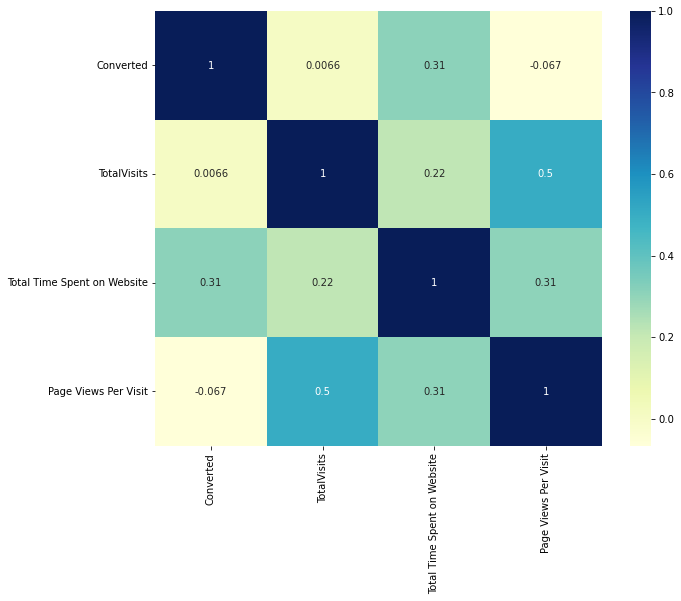

In [54]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
##Total Visits

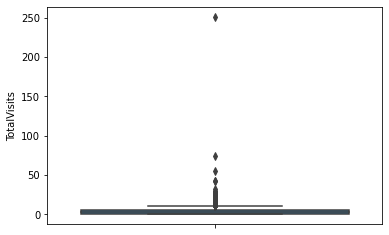

In [55]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [56]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6401.000000
mean        3.590689
std         4.847158
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

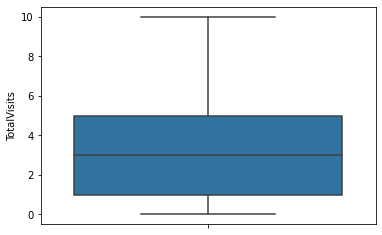

In [57]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

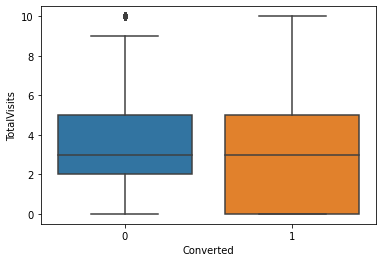

In [58]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

In [ ]:
##Total time spent on website

In [59]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6401.000000
mean      532.855491
std       565.262896
min         0.000000
5%          0.000000
25%        31.000000
50%       283.000000
75%      1020.000000
90%      1426.000000
95%      1591.000000
99%      1849.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

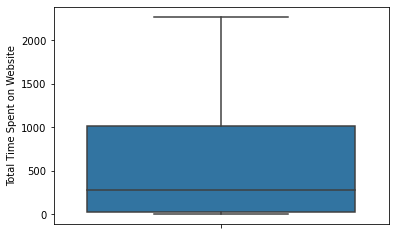

In [60]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

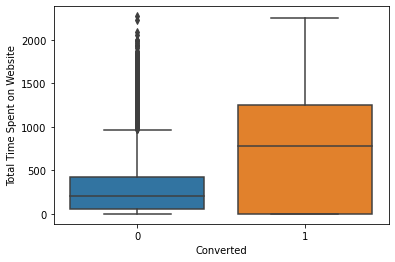

In [61]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

In [ ]:
##Page views per visit

In [62]:
leads['Page Views Per Visit'].describe()

count    6401.000000
mean        2.468644
std         2.167626
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        55.000000
Name: Page Views Per Visit, dtype: float64

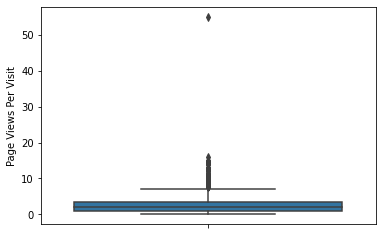

In [63]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

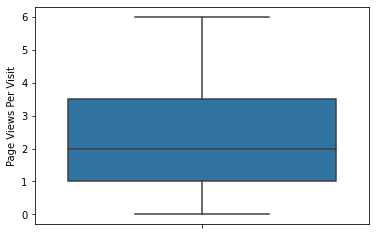

In [64]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

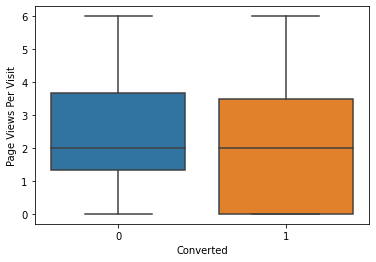

In [65]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

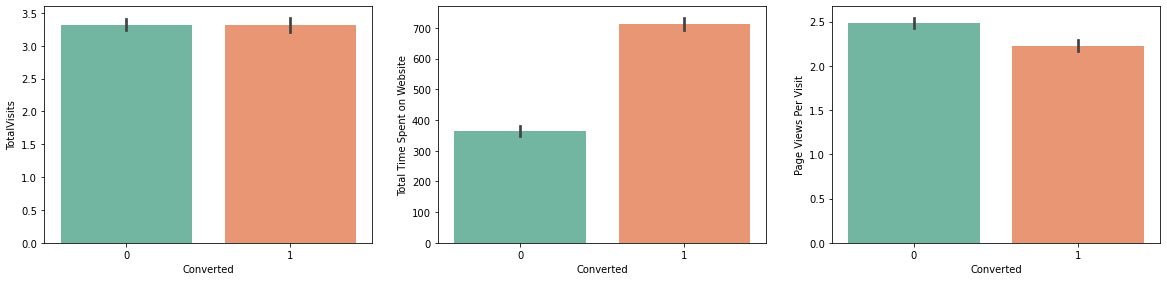

In [66]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

In [ ]:
## Data Preparation

In [67]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [68]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [69]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6401 non-null   object 
 1   Lead Source                      6401 non-null   object 
 2   Do Not Email                     6401 non-null   int64  
 3   Converted                        6401 non-null   int64  
 4   TotalVisits                      6401 non-null   float64
 5   Total Time Spent on Website      6401 non-null   int64  
 6   Page Views Per Visit             6401 non-null   float64
 7   What is your current occupation  6401 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 450.1+ KB


In [70]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [72]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)




In [73]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [74]:
#checking dataset after dummy variable creation
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
##Test-Train Split

In [75]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [76]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [77]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
##Feature Scaling

In [79]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [80]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
6099,-0.273127,2.350427,-0.809479,2.025517,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5581,-0.273127,-1.192374,-0.940692,-1.320622,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1329,-0.273127,0.933307,0.456548,2.025517,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7102,-0.273127,0.933307,-0.181785,-0.205242,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7326,-0.273127,-1.192374,-0.940692,-1.320622,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [81]:
# Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

48.28932979221997

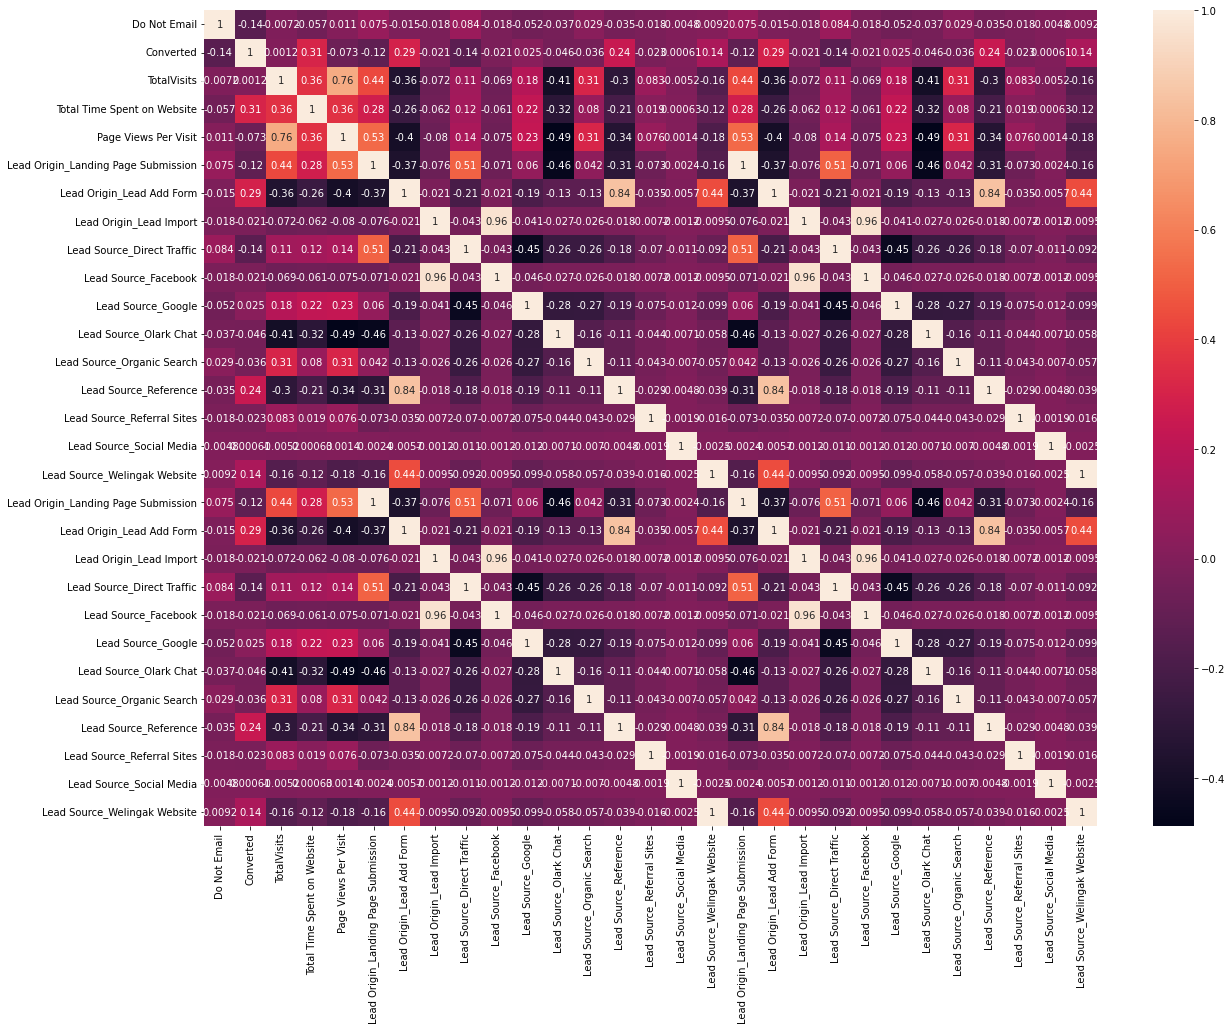

In [82]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [83]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [84]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [ ]:
##Model Building using Stats Model & RFE

In [90]:
# importing necessary library
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [91]:
rfe.support_

array([False, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1)]

In [93]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website'],
      dtype='object')

In [94]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Social Media', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Reference'],
      dtype='object')

In [ ]:
## Model 1

In [95]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4470
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 16 Oct 2022   Deviance:                       4769.7
Time:                        08:25:56   Pearson chi2:                 4.62e+03
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.6277      0.090      7.003      0.000       0.452       0.803
Total Time Spent on Website      1.1913      0.044     27.041      0.000       1.105       1.278
Lead Origin_Lead Add Form        1.0682      0.184      5.815      0.000       0.708       1.428
Lead Origin_Lead Add Form        1.0006      0.184      5.447      0.000       0.641       1.361
Lead Source_Direct Traffic      -0.2923      0.029     -9.909      0.000      -0.350      -0.234
Lead Source_Direct Traffic      -0.3829      0.029    -12.981      0.000      -0.441      -0.325
Lead Source_Google              -0.2563      0.028     -9.088      0.000      -0.312      -0.201
Lead Source_Google              -0.2574      0.028     -9.125      0.000      -0.313      -0.202
Lead Source_Organic Search      -0.3997      0.033    -12.126      0.000      -0.464      -0.335
Lead Source_Organic Search      -0.4534      0.033    -13.758      0.000      -0.518      -0.389
Lead Source_Reference           -0.7297      0.383     -1.906      0.057      -1.480       0.021
Lead Source_Reference           -0.4264      0.383     -1.114      0.265      -1.177       0.324
Lead Source_Referral Sites      -0.3514      0.087     -4.037      0.000      -0.522      -0.181
Lead Source_Referral Sites      -0.3487      0.087     -4.006      0.000      -0.519      -0.178
Lead Source_Welingak Website     0.2530      0.299      0.846      0.397      -0.333       0.839
Lead Source_Welingak Website     0.2534      0.299      0.847      0.397      -0.333       0.839
Lead Origin_Lead Add Form        0.9240      0.184      5.030      0.000       0.564       1.284
Lead Origin_Lead Add Form        0.9240      0.184      5.030      0.000       0.564       1.284
Lead Source_Direct Traffic      -0.4035      0.029    -13.680      0.000      -0.461      -0.346
Lead Source_Direct Traffic      -0.4035      0.029    -13.680      0.000      -0.461      -0.346
Lead Source_Google              -0.2426      0.028     -8.602      0.000      -0.298      -0.187
Lead Source_Google              -0.2426      0.028     -8.602      0.000      -0.298      -0.187
Lead Source_Organic Search      -0.1527      0.033     -4.633      0.000      -0.217      -0.088
Lead Source_Organic Search      -0.1527      0.033     -4.633      0.000      -0.217      -0.088
Lead Source_Referral Sites      -0.3757      0.087     -4.316      0.000      -0.546      -0.205
Lead Source_Referral Sites      -0.3757      0.087     -4.316      0.000      -0.546      -0.205
Lead Source_Social Media     -2.252e+15   3.36e+07  -6.71e+07      0.000   -2.25e+15   -2.25e+15
Lead Source_Social Media     -2.252e+15   3.36e+07  -6.71e+07      0.000   -2.25e+15   -2.25e+15
Lead Source_Welingak Website     0.2457      0.299      0.822      0.411    

In [97]:
## Model 2

In [98]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4470
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 16 Oct 2022   Deviance:                       4769.7
Time:                        08:27:52   Pearson chi2:                 4.62e+03
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.6277      0.090      7.003      0.000       0.452       0.803
Total Time Spent on Website      1.1913      0.044     27.041      0.000       1.105       1.278
Lead Origin_Lead Add Form        1.0682      0.184      5.815      0.000       0.708       1.428
Lead Origin_Lead Add Form        1.0006      0.184      5.447      0.000       0.641       1.361
Lead Source_Direct Traffic      -0.2923      0.029     -9.909      0.000      -0.350      -0.234
Lead Source_Direct Traffic      -0.3829      0.029    -12.981      0.000      -0.441      -0.325
Lead Source_Google              -0.2563      0.028     -9.088      0.000      -0.312      -0.201
Lead Source_Google              -0.2574      0.028     -9.125      0.000      -0.313      -0.202
Lead Source_Organic Search      -0.3997      0.033    -12.126      0.000      -0.464      -0.335
Lead Source_Organic Search      -0.4534      0.033    -13.758      0.000      -0.518      -0.389
Lead Source_Reference           -0.7297      0.383     -1.906      0.057      -1.480       0.021
Lead Source_Reference           -0.4264      0.383     -1.114      0.265      -1.177       0.324
Lead Source_Referral Sites      -0.3514      0.087     -4.037      0.000      -0.522      -0.181
Lead Source_Referral Sites      -0.3487      0.087     -4.006      0.000      -0.519      -0.178
Lead Source_Welingak Website     0.2530      0.299      0.846      0.397      -0.333       0.839
Lead Source_Welingak Website     0.2534      0.299      0.847      0.397      -0.333       0.839
Lead Origin_Lead Add Form        0.9240      0.184      5.030      0.000       0.564       1.284
Lead Origin_Lead Add Form        0.9240      0.184      5.030      0.000       0.564       1.284
Lead Source_Direct Traffic      -0.4035      0.029    -13.680      0.000      -0.461      -0.346
Lead Source_Direct Traffic      -0.4035      0.029    -13.680      0.000      -0.461      -0.346
Lead Source_Google              -0.2426      0.028     -8.602      0.000      -0.298      -0.187
Lead Source_Google              -0.2426      0.028     -8.602      0.000      -0.298      -0.187
Lead Source_Organic Search      -0.1527      0.033     -4.633      0.000      -0.217      -0.088
Lead Source_Organic Search      -0.1527      0.033     -4.633      0.000      -0.217      -0.088
Lead Source_Referral Sites      -0.3757      0.087     -4.316      0.000      -0.546      -0.205
Lead Source_Referral Sites      -0.3757      0.087     -4.316      0.000      -0.546      -0.205
Lead Source_Social Media     -2.252e+15   3.36e+07  -6.71e+07      0.000   -2.25e+15   -2.25e+15
Lead Source_Social Media     -2.252e+15   3.36e+07  -6.71e+07      0.000   -2.25e+15   -2.25e+15
Lead Source_Welingak Website     0.2457      0.299      0.822      0.411    

In [99]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

In [ ]:
## Model 3

In [100]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4471
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 16 Oct 2022   Deviance:                       4770.4
Time:                        08:29:00   Pearson chi2:                 4.61e+03
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.6337      0.089      7.125      0.000       0.459       0.808
Total Time Spent on Website     1.1928      0.044     27.132      0.000       1.107       1.279
Lead Origin_Lead Add Form       1.6220      0.148     10.936      0.000       1.331       1.913
Lead Origin_Lead Add Form       0.9271      0.148      6.251      0.000       0.636       1.218
Lead Source_Direct Traffic     -0.5329      0.029    -18.251      0.000      -0.590      -0.476
Lead Source_Direct Traffic     -0.3935      0.029    -13.476      0.000      -0.451      -0.336
Lead Source_Google             -0.7092      0.028    -25.358      0.000      -0.764      -0.654
Lead Source_Google              0.1435      0.028      5.131      0.000       0.089       0.198
Lead Source_Organic Search     -0.0713      0.033     -2.178      0.029      -0.135      -0.007
Lead Source_Organic Search     -1.4649      0.033    -44.776      0.000      -1.529      -1.401
Lead Source_Reference          -0.8117      0.313     -2.595      0.009      -1.425      -0.199
Lead Source_Reference          -0.8122      0.313     -2.596      0.009      -1.425      -0.199
Lead Source_Referral Sites     -0.3805      0.087     -4.381      0.000      -0.551      -0.210
Lead Source_Referral Sites     -0.3926      0.087     -4.520      0.000      -0.563      -0.222
Lead Origin_Lead Add Form       0.9154      0.148      6.172      0.000       0.625       1.206
Lead Origin_Lead Add Form       0.9154      0.148      6.172      0.000       0.625       1.206
Lead Source_Direct Traffic     -0.2812      0.029     -9.631      0.000      -0.338      -0.224
Lead Source_Direct Traffic     -0.2812      0.029     -9.631      0.000      -0.338      -0.224
Lead Source_Google             -0.2210      0.028     -7.902      0.000      -0.276      -0.166
Lead Source_Google             -0.2210      0.028     -7.902      0.000      -0.276      -0.166
Lead Source_Organic Search      0.1859      0.033      5.682      0.000       0.122       0.250
Lead Source_Organic Search      0.1859      0.033      5.682      0.000       0.122       0.250
Lead Source_Referral Sites     -0.3424      0.087     -3.943      0.000      -0.513      -0.172
Lead Source_Referral Sites     -0.3424      0.087     -3.943      0.000      -0.513      -0.172
Lead Source_Social Media    -2.252e+15   3.36e+07  -6.71e+07      0.000   -2.25e+15   -2.25e+15
Lead Source_Social Media    -2.252e+15   3.36e+07  -6.71e+07      0.000   -2.25e+15   -2.25e+15
===============================================================================================
"""

In [102]:
## Model 4

In [103]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4471
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 16 Oct 2022   Deviance:                       4770.4
Time:                        08:30:26   Pearson chi2:                 4.61e+03
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.6337      0.089      7.125      0.000       0.459       0.808
Total Time Spent on Website     1.1928      0.044     27.132      0.000       1.107       1.279
Lead Origin_Lead Add Form       1.6220      0.148     10.936      0.000       1.331       1.913
Lead Origin_Lead Add Form       0.9271      0.148      6.251      0.000       0.636       1.218
Lead Source_Direct Traffic     -0.5329      0.029    -18.251      0.000      -0.590      -0.476
Lead Source_Direct Traffic     -0.3935      0.029    -13.476      0.000      -0.451      -0.336
Lead Source_Google             -0.7092      0.028    -25.358      0.000      -0.764      -0.654
Lead Source_Google              0.1435      0.028      5.131      0.000       0.089       0.198
Lead Source_Organic Search     -0.0713      0.033     -2.178      0.029      -0.135      -0.007
Lead Source_Organic Search     -1.4649      0.033    -44.776      0.000      -1.529      -1.401
Lead Source_Reference          -0.8117      0.313     -2.595      0.009      -1.425      -0.199
Lead Source_Reference          -0.8122      0.313     -2.596      0.009      -1.425      -0.199
Lead Source_Referral Sites     -0.3805      0.087     -4.381      0.000      -0.551      -0.210
Lead Source_Referral Sites     -0.3926      0.087     -4.520      0.000      -0.563      -0.222
Lead Origin_Lead Add Form       0.9154      0.148      6.172      0.000       0.625       1.206
Lead Origin_Lead Add Form       0.9154      0.148      6.172      0.000       0.625       1.206
Lead Source_Direct Traffic     -0.2812      0.029     -9.631      0.000      -0.338      -0.224
Lead Source_Direct Traffic     -0.2812      0.029     -9.631      0.000      -0.338      -0.224
Lead Source_Google             -0.2210      0.028     -7.902      0.000      -0.276      -0.166
Lead Source_Google             -0.2210      0.028     -7.902      0.000      -0.276      -0.166
Lead Source_Organic Search      0.1859      0.033      5.682      0.000       0.122       0.250
Lead Source_Organic Search      0.1859      0.033      5.682      0.000       0.122       0.250
Lead Source_Referral Sites     -0.3424      0.087     -3.943      0.000      -0.513      -0.172
Lead Source_Referral Sites     -0.3424      0.087     -3.943      0.000      -0.513      -0.172
Lead Source_Social Media    -2.252e+15   3.36e+07  -6.71e+07      0.000   -2.25e+15   -2.25e+15
Lead Source_Social Media    -2.252e+15   3.36e+07  -6.71e+07      0.000   -2.25e+15   -2.25e+15
===============================================================================================
"""

In [ ]:
##Model 5

In [104]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4480
Model:                            GLM   Df Residuals:                     4471
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 16 Oct 2022   Deviance:                       4770.4
Time:                        08:31:19   Pearson chi2:                 4.61e+03
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.6337      0.089      7.125      0.000       0.459       0.808
Total Time Spent on Website     1.1928      0.044     27.132      0.000       1.107       1.279
Lead Origin_Lead Add Form       1.6220      0.148     10.936      0.000       1.331       1.913
Lead Origin_Lead Add Form       0.9271      0.148      6.251      0.000       0.636       1.218
Lead Source_Direct Traffic     -0.5329      0.029    -18.251      0.000      -0.590      -0.476
Lead Source_Direct Traffic     -0.3935      0.029    -13.476      0.000      -0.451      -0.336
Lead Source_Google             -0.7092      0.028    -25.358      0.000      -0.764      -0.654
Lead Source_Google              0.1435      0.028      5.131      0.000       0.089       0.198
Lead Source_Organic Search     -0.0713      0.033     -2.178      0.029      -0.135      -0.007
Lead Source_Organic Search     -1.4649      0.033    -44.776      0.000      -1.529      -1.401
Lead Source_Reference          -0.8117      0.313     -2.595      0.009      -1.425      -0.199
Lead Source_Reference          -0.8122      0.313     -2.596      0.009      -1.425      -0.199
Lead Source_Referral Sites     -0.3805      0.087     -4.381      0.000      -0.551      -0.210
Lead Source_Referral Sites     -0.3926      0.087     -4.520      0.000      -0.563      -0.222
Lead Origin_Lead Add Form       0.9154      0.148      6.172      0.000       0.625       1.206
Lead Origin_Lead Add Form       0.9154      0.148      6.172      0.000       0.625       1.206
Lead Source_Direct Traffic     -0.2812      0.029     -9.631      0.000      -0.338      -0.224
Lead Source_Direct Traffic     -0.2812      0.029     -9.631      0.000      -0.338      -0.224
Lead Source_Google             -0.2210      0.028     -7.902      0.000      -0.276      -0.166
Lead Source_Google             -0.2210      0.028     -7.902      0.000      -0.276      -0.166
Lead Source_Organic Search      0.1859      0.033      5.682      0.000       0.122       0.250
Lead Source_Organic Search      0.1859      0.033      5.682      0.000       0.122       0.250
Lead Source_Referral Sites     -0.3424      0.087     -3.943      0.000      -0.513      -0.172
Lead Source_Referral Sites     -0.3424      0.087     -3.943      0.000      -0.513      -0.172
Lead Source_Social Media    -2.252e+15   3.36e+07  -6.71e+07      0.000   -2.25e+15   -2.25e+15
Lead Source_Social Media    -2.252e+15   3.36e+07  -6.71e+07      0.000   -2.25e+15   -2.25e+15
===============================================================================================
"""

In [ ]:
##Calculating VIF

In [105]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Source_Referral Sites,inf
13,Lead Origin_Lead Add Form,inf
23,Lead Source_Social Media,inf
22,Lead Source_Referral Sites,inf
21,Lead Source_Referral Sites,inf
20,Lead Source_Organic Search,inf
19,Lead Source_Organic Search,inf
18,Lead Source_Google,inf
17,Lead Source_Google,inf
16,Lead Source_Direct Traffic,inf


In [106]:
##Predicting a Train model

In [107]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6099    0.182997
5581    0.380289
1329    0.503480
7102    0.321372
7326    0.906160
7288    0.380289
8504    0.884192
494     0.764276
1338    0.128801
8732    0.380289
dtype: float64

In [108]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18299665, 0.38028946, 0.50348023, 0.32137238, 0.90615973,
       0.38028946, 0.8841917 , 0.76427639, 0.12880088, 0.38028946])

In [109]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.182997,6099
1,0,0.380289,5581
2,1,0.503480,1329
3,1,0.321372,7102
4,1,0.906160,7326


In [110]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.182997,6099,0
1,0,0.380289,5581,0
2,1,0.503480,1329,1
3,1,0.321372,7102,0
4,1,0.906160,7326,1


In [111]:
##Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [112]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1933  394]
 [ 687 1466]]


In [113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7587053571428571


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6809103576405017

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.8306832831972497

In [118]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.16931671680275032


In [119]:
# positive predictive value 
print (TP / float(TP+FP))

0.7881720430107527


In [120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7377862595419847


In [121]:
## PLOTTING ROC CURVE

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

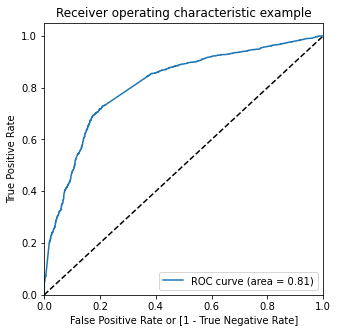

In [124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [125]:
##Finding Optimal Cutoff Point

In [126]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.182997,6099,0,1,1,0,0,0,0,0,0,0,0
1,0,0.380289,5581,0,1,1,1,1,0,0,0,0,0,0
2,1,0.503480,1329,1,1,1,1,1,1,1,0,0,0,0
3,1,0.321372,7102,0,1,1,1,1,0,0,0,0,0,0
4,1,0.906160,7326,1,1,1,1,1,1,1,1,1,1,1


In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480804  1.000000  0.000430
0.1   0.1  0.480804  1.000000  0.000430
0.2   0.2  0.592411  0.945193  0.266008
0.3   0.3  0.710045  0.873665  0.558659
0.4   0.4  0.761161  0.728286  0.791577
0.5   0.5  0.758705  0.680910  0.830683
0.6   0.6  0.729688  0.586623  0.862054
0.7   0.7  0.695759  0.475615  0.899441
0.8   0.8  0.645536  0.325592  0.941556
0.9   0.9  0.607366  0.204366  0.980232


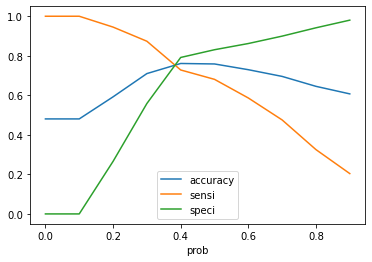

In [128]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [129]:
##From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [130]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.182997,6099,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.380289,5581,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.503480,1329,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.321372,7102,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.906160,7326,1,1,1,1,1,1,1,1,1,1,1,1


In [131]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.182997,6099,0,18
1,0,0.380289,5581,1,38
2,1,0.503480,1329,1,50
3,1,0.321372,7102,1,32
4,1,0.906160,7326,1,91


In [132]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1881
0     272
Name: final_Predicted, dtype: int64

In [133]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

In [134]:
##Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [135]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7100446428571429

In [136]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1300, 1027],
       [ 272, 1881]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.873664653971203

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.5586592178770949

In [140]:
##Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [141]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.441340782122905


In [142]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6468363136176066


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8269720101781171


In [144]:
##Precision and Recall

In [145]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[1300, 1027],
       [ 272, 1881]], dtype=int64)

In [146]:
## Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6468363136176066

In [147]:
## Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.873664653971203

In [148]:
from sklearn.metrics import precision_score, recall_score

In [149]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6468363136176066

In [150]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.873664653971203

In [151]:
##Precision and Recall Trade-off

In [152]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [153]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

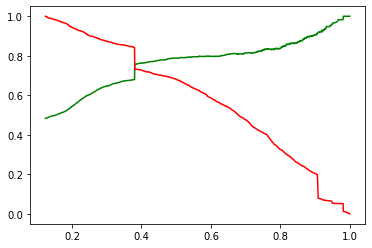

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [155]:
##Predictions on the test set

In [156]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,...,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website
2413,-0.270526,-0.451915,-0.347307,-0.198289,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1567,-0.270526,-1.197090,-0.947568,-1.340647,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4130,-0.270526,1.038435,0.898985,-0.198289,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3842,-0.270526,-1.197090,-0.947568,-1.340647,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6843,-0.270526,-0.079328,1.493965,0.372890,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [157]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Google,Lead Source_Organic Search,Lead Source_Organic Search,Lead Source_Reference,...,Lead Source_Direct Traffic,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Google,Lead Source_Organic Search,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Social Media
2413,-0.347307,0,0,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1567,-0.947568,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4130,0.898985,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3842,-0.947568,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6843,1.493965,0,0,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [158]:
X_test_sm = sm.add_constant(X_test)

In [159]:
X_test_sm.shape

(1921, 26)

In [160]:
y_test_pred = res.predict(X_test_sm)  

In [161]:
y_test_pred[:10]

2413    0.219362
1567    0.905460
4130    0.667820
3842    0.378358
6843    0.716436
8209    0.158648
6345    0.536381
6060    0.378358
4083    0.217213
1852    0.217629
dtype: float64

In [162]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [163]:
# Let's see the head
y_pred_1.head()

,0
2413,0.219362
1567,0.905460
4130,0.667820
3842,0.378358
6843,0.716436


In [164]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [165]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [166]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2413,0.219362
1,1,1567,0.905460
2,0,4130,0.667820
3,0,3842,0.378358
4,1,6843,0.716436


In [169]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [170]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,2413,0.219362
1,1,1567,0.905460
2,0,4130,0.667820
3,0,3842,0.378358
4,1,6843,0.716436


In [171]:
##Assigning Lead Score

In [172]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [173]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,2413,0,0.219362,22
1,1567,1,0.905460,91
2,4130,0,0.667820,67
3,3842,0,0.378358,38
4,6843,1,0.716436,72


In [174]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [175]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,2413,0,0.219362,22,0
1,1567,1,0.905460,91,1
2,4130,0,0.667820,67,1
3,3842,0,0.378358,38,1
4,6843,1,0.716436,72,1


In [176]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    801
0    137
Name: final_Predicted, dtype: int64

In [177]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

In [178]:
##Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [179]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7027589796980739

In [180]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[549, 434],
       [137, 801]], dtype=int64)

In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8539445628997868

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.5584944048830112

In [184]:
##Precision and Recall metrics for the test set

In [185]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.648582995951417

In [186]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8539445628997868